In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.model_selection import FeatureImportances
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, precision_score, roc_curve
from yellowbrick.classifier import ConfusionMatrix 
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC
%matplotlib inline

In [29]:
application_test_filter = pd.read_csv('/content/drive/MyDrive/DT&ML/Analise de Risco/application_test_filter.csv')
application_train_filter = pd.read_csv('/content/drive/MyDrive/DT&ML/Analise de Risco/application_train_filter.csv')
previous_loan_filter = pd.read_csv('/content/drive/MyDrive/DT&ML/Analise de Risco/previous_loan_filter.csv')

In [30]:
application_train_filter.drop(columns = 'Unnamed: 0', inplace=True)
application_test_filter.drop(columns = 'Unnamed: 0', inplace=True)

In [4]:
application_train_filter.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,FLAG_OWN_CAR,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,NAME_FAMILY_STATUS,ORGANIZATION_TYPE,OWN_CAR_AGE,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,N,Secondary / secondary special,House / apartment,-9461,-637,Single / not married,Business Entity Type 3,NaN,1.0,-1134.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,N,Higher education,House / apartment,-16765,-1188,Married,School,NaN,2.0,-828.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,Y,Secondary / secondary special,House / apartment,-19046,-225,Single / not married,Government,26.0,1.0,-815.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,N,Secondary / secondary special,House / apartment,-19005,-3039,Civil marriage,Business Entity Type 3,NaN,2.0,-617.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,N,Secondary / secondary special,House / apartment,-19932,-3038,Single / not married,Religion,NaN,1.0,-1106.0


In [31]:
application_train_filter['OWN_CAR_AGE'].fillna(0, inplace=True)

In [32]:
application_train_filter.dropna(inplace=True)

In [33]:
application_test_filter['OWN_CAR_AGE'].fillna(0, inplace=True)

In [34]:
application_test_filter.dropna(inplace=True)

In [ ]:
#Function will return a table with the total of Na values and the percent
def missing_data(data):
  total = data.isnull().sum().sort_values(ascending= False)
  percent = (data.isnull().mean() * 100).sort_values(ascending=False)
  return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

##Selecting attributes

- is between -1.0 and -0.7, a strong linear relationship

- is between -0.7 and -0.3, a moderate linear relationship

- is between -0.3 and -0.1, a weak linear relationship

- is between -0.1 and +0.1, a linear relationship that can be ignored

- is between +0.1 and +0.3, a weak quantitative linear relationship

- is between +0.3 and +0.7, a moderate quantitative linear relationship

- is between +0.7 and +1.0, a strong quantitative linear relationship

In [ ]:
application_train_filter.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE
SK_ID_CURR,1.000000,-0.002115,-0.001142,-0.001821,-0.000367,-0.000432,-0.001480,0.001356,0.001592,-0.002910,-0.000863
TARGET,-0.002115,1.000000,0.019179,-0.003980,-0.030371,-0.012816,0.078248,-0.044939,0.002283,0.009303,0.055221
CNT_CHILDREN,-0.001142,0.019179,1.000000,0.012886,0.002142,0.021375,0.330962,-0.239834,0.068838,0.879164,-0.005862
AMT_INCOME_TOTAL,-0.001821,-0.003980,0.012886,1.000000,0.156866,0.191656,0.027261,-0.064221,0.021537,0.016342,-0.018586
AMT_CREDIT,-0.000367,-0.030371,0.002142,0.156866,1.000000,0.770139,-0.055431,-0.066842,0.027925,0.063154,-0.073711
AMT_ANNUITY,-0.000432,-0.012816,0.021375,0.191656,0.770139,1.000000,0.009444,-0.104331,0.042421,0.075539,-0.063747
DAYS_BIRTH,-0.001480,0.078248,0.330962,0.027261,-0.055431,0.009444,1.000000,-0.615871,0.084726,0.278903,0.082935
DAYS_EMPLOYED,0.001356,-0.044939,-0.239834,-0.064221,-0.066842,-0.104331,-0.615871,1.000000,-0.087921,-0.233561,0.023036
OWN_CAR_AGE,0.001592,0.002283,0.068838,0.021537,0.027925,0.042421,0.084726,-0.087921,1.000000,0.088191,-0.023626
CNT_FAM_MEMBERS,-0.002910,0.009303,0.879164,0.016342,0.063154,0.075539,0.278903,-0.233561,0.088191,1.000000,-0.027108


- 'CNT_CHILDREN' and 'CNT_FAM_MEMBERS' are highly correlated with positive **0.879161**

- 'AMT_CREDIT' and 'AMT_ANNUITY' are highly correlated with positive **0.770138**

- 'DAYS_BIRTH' and 'DAYS_EMPLOYED' are highly correlated with negative **-0.615864**


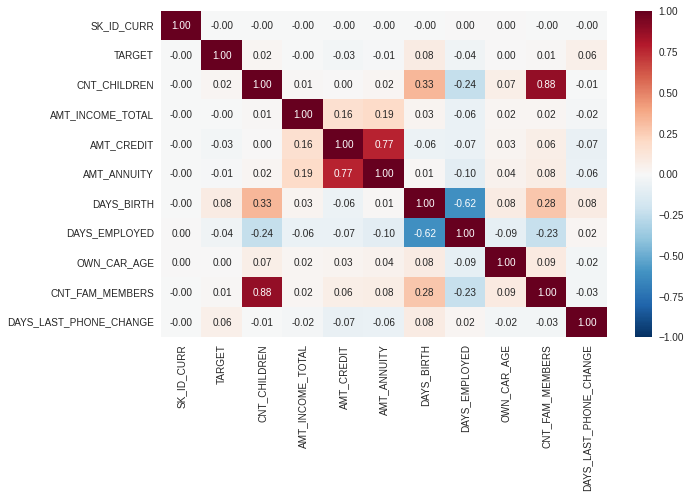

In [ ]:
fif, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(application_train_filter.corr(), \
            fmt='.2f', annot=True, ax=ax, cmap='RdBu_r', vmin=-1, vmax=1)
plt.savefig('/content/drive/MyDrive/DT&ML/Analise de Risco/correlation_of_columns.png')

In [ ]:
application_train_filter.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'FLAG_OWN_CAR', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'NAME_FAMILY_STATUS',
       'ORGANIZATION_TYPE', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [ ]:
cols = ['TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']

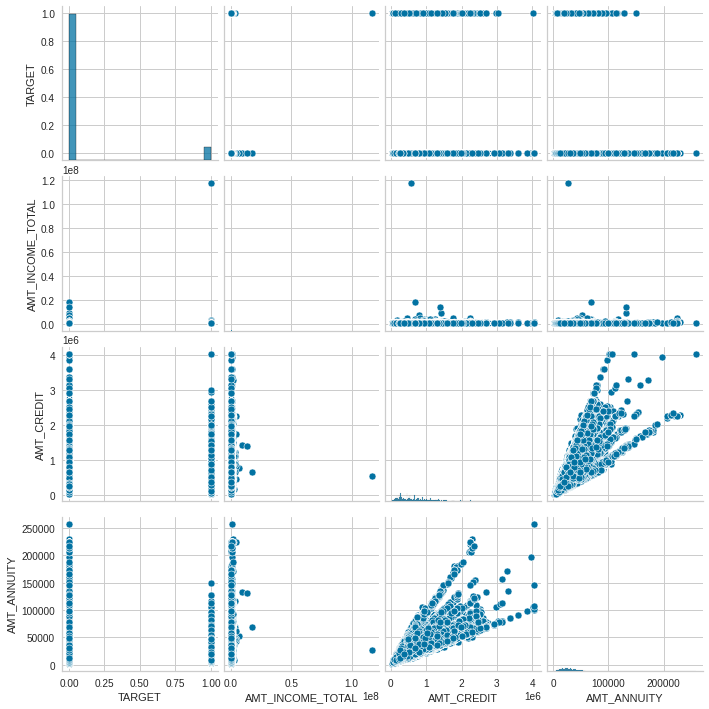

In [ ]:
sns.pairplot(application_train_filter[cols])

 select only one of the collinear columns, the one that has the most correlation with the target, the other is deleted

In [ ]:
print(application_train_filter['AMT_ANNUITY'].corr(application_train_filter['TARGET']))
print(application_train_filter['AMT_CREDIT'].corr(application_train_filter['TARGET']))

-0.01281606760316885
-0.03037140640423492


In [ ]:
num = [-0.01281656151541364, -0.03036928646142965]
max(num)

-0.01281656151541364

In [35]:
del application_train_filter['AMT_CREDIT']
del application_test_filter['AMT_CREDIT']

In [ ]:
print(application_train_filter['CNT_CHILDREN'].corr(application_train_filter['TARGET']))
print(application_train_filter['CNT_FAM_MEMBERS'].corr(application_train_filter['TARGET']))

0.01917898189424819
0.00930260360237188


In [ ]:
num = [0.019187133596269994, 0.00930778439653112]
max(num)

0.019187133596269994

In [36]:
del application_train_filter['CNT_FAM_MEMBERS']
del application_test_filter['CNT_FAM_MEMBERS']

In [ ]:
print(application_train_filter['DAYS_EMPLOYED'].corr(application_train_filter['TARGET']))
print(application_train_filter['DAYS_BIRTH'].corr(application_train_filter['TARGET']))

-0.044938721587430536
0.07824849364252266


In [ ]:
#in this case the negative value is more correlated with the target
num = [-0.044931662657738715, 0.07823930830982694]
max(num)

0.07823930830982694

In [37]:
del application_train_filter['DAYS_BIRTH']
del application_test_filter['DAYS_BIRTH']

In [39]:
application_train_filter.to_csv('/content/drive/MyDrive/DT&ML/Analise de Risco/app_train.csv')
application_test_filter.to_csv('/content/drive/MyDrive/DT&ML/Analise de Risco/app_test.csv')

In [76]:
app_train = pd.read_csv('/content/drive/MyDrive/DT&ML/Analise de Risco/app_train.csv')
app_test = pd.read_csv('/content/drive/MyDrive/DT&ML/Analise de Risco/app_test.csv')

##Preprocessing data

###Standardizing numeric variables

In [44]:
numeric_cols = [ 'AMT_INCOME_TOTAL', 'AMT_ANNUITY',  'DAYS_EMPLOYED','OWN_CAR_AGE',
       'DAYS_LAST_PHONE_CHANGE']

In [77]:
app_train[numeric_cols]

,AMT_INCOME_TOTAL,AMT_ANNUITY,DAYS_EMPLOYED,OWN_CAR_AGE,DAYS_LAST_PHONE_CHANGE
0,202500.0,24700.5,-637,0.0,-1134.0
1,270000.0,35698.5,-1188,0.0,-828.0
2,67500.0,6750.0,-225,26.0,-815.0
3,135000.0,29686.5,-3039,0.0,-617.0
4,121500.0,21865.5,-3038,0.0,-1106.0
...,...,...,...,...,...
307491,157500.0,27558.0,-236,0.0,-273.0
307492,72000.0,12001.5,365243,0.0,0.0
307493,153000.0,29979.0,-7921,0.0,-1909.0
307494,171000.0,20205.0,-4786,0.0,-322.0


In [80]:
std = preprocessing.StandardScaler()
app_train[numeric_cols] = std.fit_transform(app_train[numeric_cols])

In [81]:
app_train[numeric_cols]

,AMT_INCOME_TOTAL,AMT_ANNUITY,DAYS_EMPLOYED,OWN_CAR_AGE,DAYS_LAST_PHONE_CHANGE
0,0.142133,-0.166144,-0.456229,-0.455287,-0.206984
1,0.426790,0.592665,-0.460129,-0.455287,0.163113
2,-0.427181,-1.404641,-0.453313,2.430514,0.178836
3,-0.142524,0.177866,-0.473231,-0.455287,0.418310
4,-0.199455,-0.361745,-0.473224,-0.455287,-0.173119
...,...,...,...,...,...
307491,-0.047638,0.031010,-0.453391,-0.455287,0.834367
307492,-0.408204,-1.042313,2.133554,-0.455287,1.164552
307493,-0.066615,0.198047,-0.507787,-0.455287,-1.144321
307494,0.009293,-0.476311,-0.485597,-0.455287,0.775103


Because the correlation is not so good, i will transform categorical variables in dummy variables

In [ ]:
app_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'FLAG_OWN_CAR',
       'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 'DAYS_EMPLOYED',
       'NAME_FAMILY_STATUS', 'ORGANIZATION_TYPE', 'OWN_CAR_AGE',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [42]:
dummy_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN',  'FLAG_OWN_CAR',
       'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 
       'NAME_FAMILY_STATUS', 'ORGANIZATION_TYPE']

In [59]:
dummy_df = pd.get_dummies(app_train[dummy_cols], drop_first=True)

In [15]:
dummy_df_test = pd.get_dummies(app_test[dummy_cols], drop_first=True)

In [82]:
x_train = pd.concat([app_train[numeric_cols], dummy_df],axis=1,join='inner')

In [83]:
X_train, X_test, y_train, y_test = train_test_split(x_train,
                                                                application_train_filter['TARGET'],
                                                                  test_size = 0.3,
                                                                  random_state = 0)

In [17]:
x_test = pd.concat([application_test_filter[numeric_cols], dummy_df],axis=1,join='inner')

In [ ]:
missing_data(x_train).head()

,Total,Percent
AMT_INCOME_TOTAL,0,0.0
AMT_ANNUITY,0,0.0
ORGANIZATION_TYPE_Realtor,0,0.0
ORGANIZATION_TYPE_Postal,0,0.0
ORGANIZATION_TYPE_Police,0,0.0


In [ ]:
missing_data(x_test).head()

,Total,Percent
AMT_INCOME_TOTAL,0,0.0
AMT_ANNUITY,0,0.0
ORGANIZATION_TYPE_Realtor,0,0.0
ORGANIZATION_TYPE_Postal,0,0.0
ORGANIZATION_TYPE_Police,0,0.0


##Creating classification model


###DecisionTreeClassifier

In [88]:
model = DecisionTreeClassifier()
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


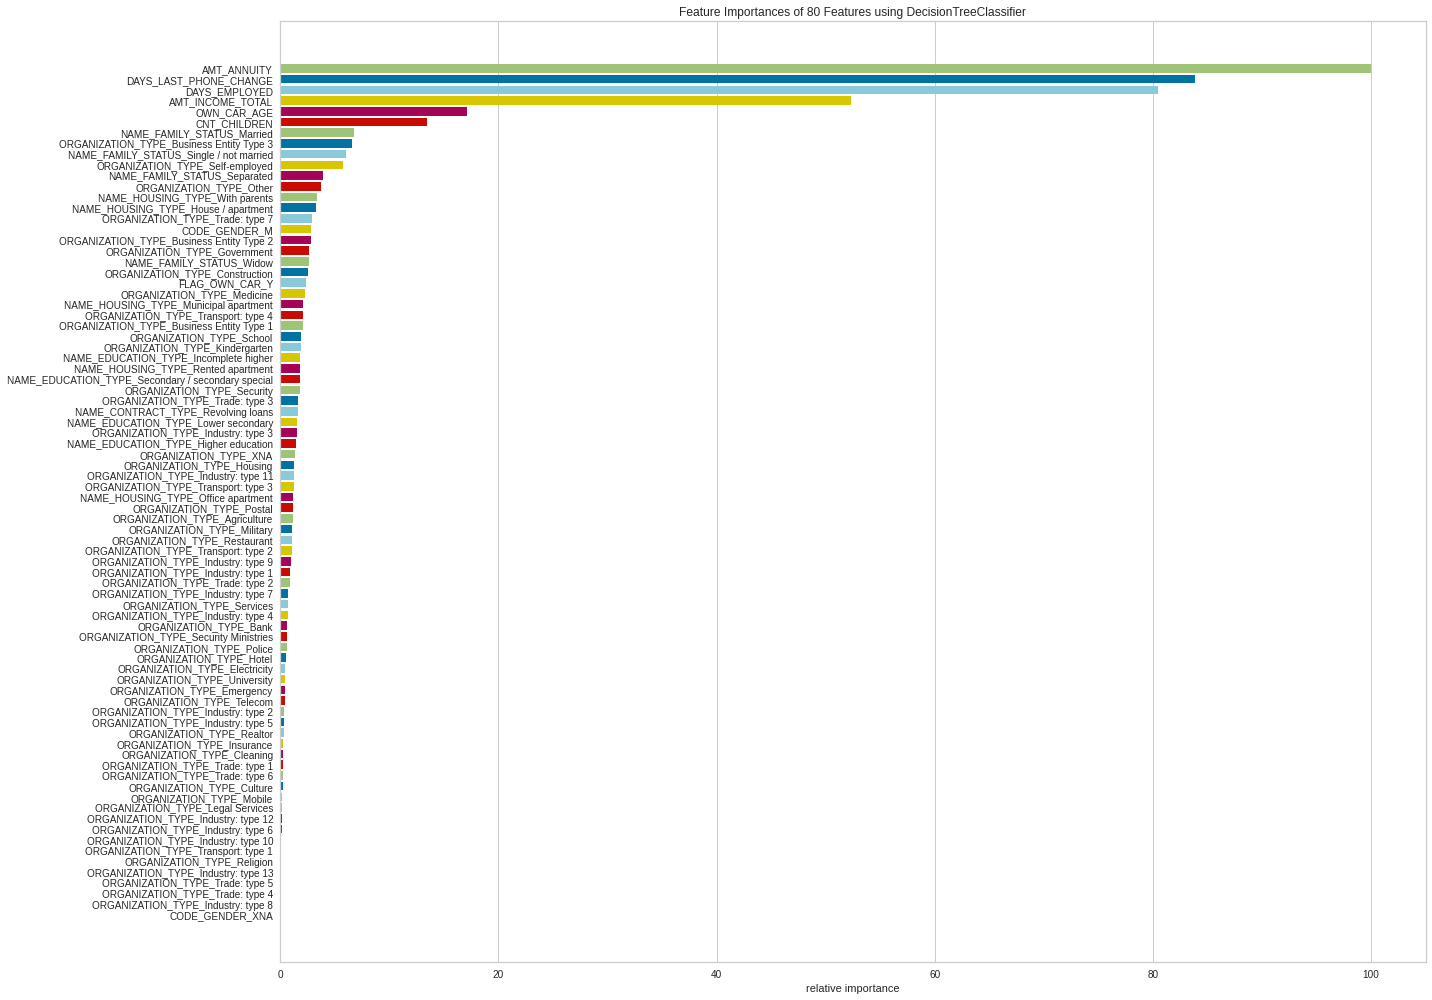

In [85]:
fig, ax = plt.subplots(figsize=(20,14))
fi = FeatureImportances(model)
fi.fit(X_train, y_train)
fi.poof()
fig.savefig('/content/drive/MyDrive/DT&ML/Analise de Risco/features_importances_m2.png')

In [61]:
features = ['AMT_INCOME_TOTAL', 'AMT_ANNUITY',  'DAYS_EMPLOYED','OWN_CAR_AGE',
       'DAYS_LAST_PHONE_CHANGE', 'CNT_CHILDREN', 'ORGANIZATION_TYPE_Business Entity Type 3']


In [86]:
x_train = x_train[features]

In [63]:
x_train.head()

,AMT_INCOME_TOTAL,AMT_ANNUITY,DAYS_EMPLOYED,OWN_CAR_AGE,DAYS_LAST_PHONE_CHANGE,CNT_CHILDREN,ORGANIZATION_TYPE_Business Entity Type 3
0,202500.0,24700.5,-637,0.0,-1134.0,0,1
1,270000.0,35698.5,-1188,0.0,-828.0,0,0
2,67500.0,6750.0,-225,26.0,-815.0,0,0
3,135000.0,29686.5,-3039,0.0,-617.0,0,1
4,121500.0,21865.5,-3038,0.0,-1106.0,0,0


In [87]:
X_train, X_test, y_train, y_test = train_test_split(x_train,
                                                                application_train_filter['TARGET'],
                                                                  test_size = 0.3,
                                                                  random_state = 0)

**Using just the variables who has more impact in target**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


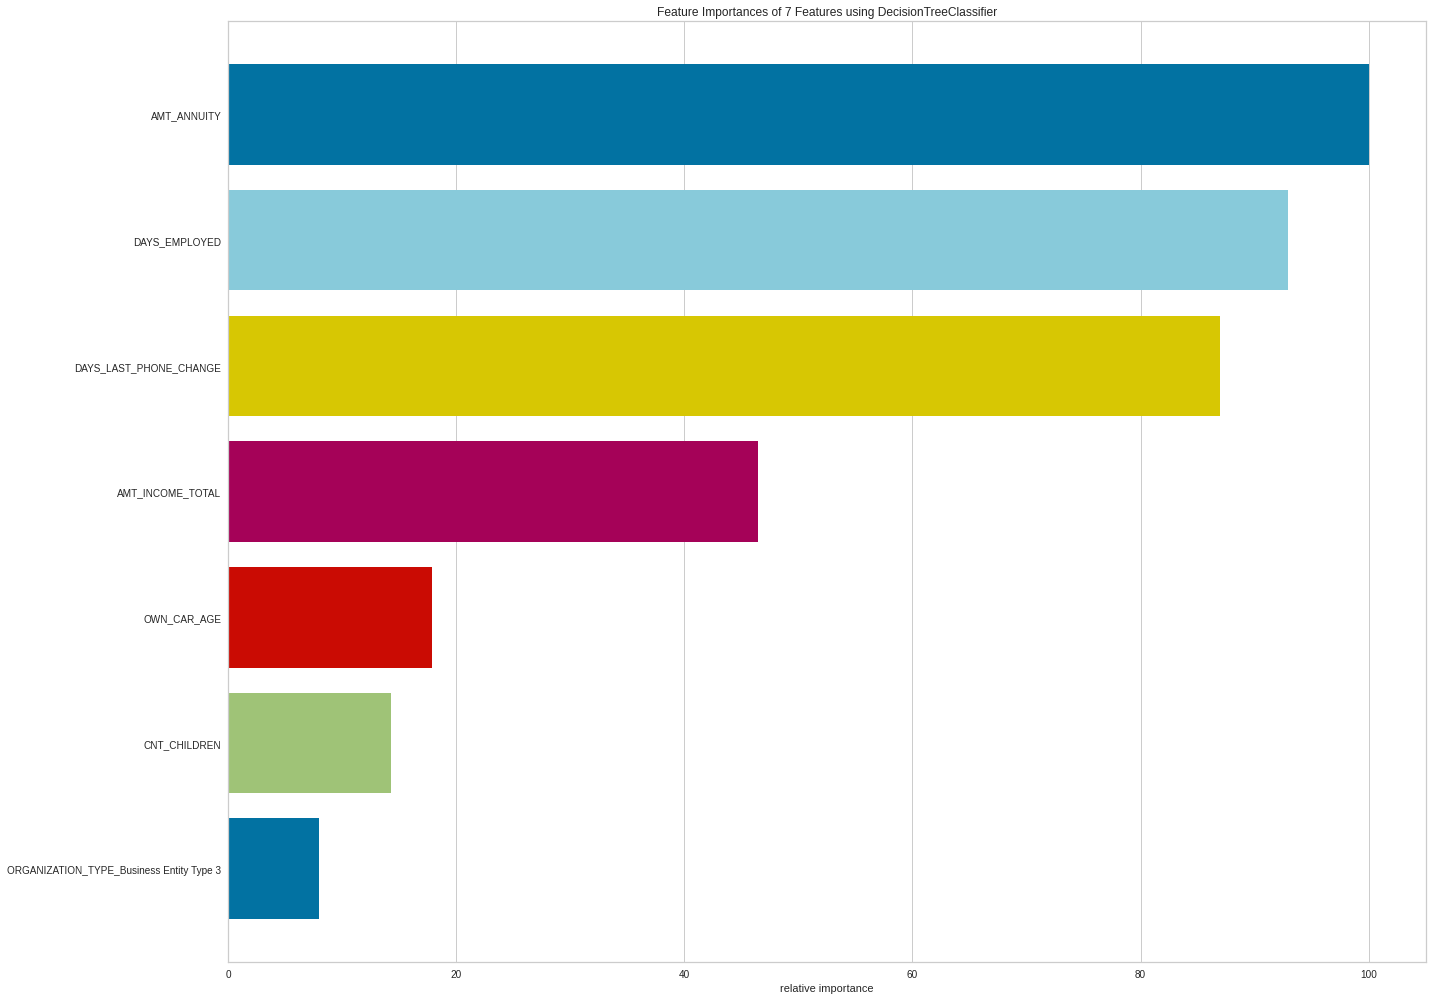

In [89]:
fig, ax = plt.subplots(figsize=(20,14))
fi = FeatureImportances(model)
fi.fit(X_train, y_train)
fi.poof()
fig.savefig('/content/drive/MyDrive/DT&ML/Analise de Risco/features_importances_m2.png')

##Metrics and model evaluation

- Accuracy: percentage of correct classifications

In [90]:
#accuracy
model.score(X_test, y_test)

0.8442367938947848

- Precision: Is the percentage of positive predictions that were correct

In [93]:
precision_score(y_test, y_pred)

0.10347222222222222

The model is weak in predicting who does not pay the loan, a possible solution would be to obtain more data on who does not pay.

In [ ]:
mapping = {0: "Paid", 1: 'Not Paid'}

/usr/local/lib/python3.7/dist-packages/yellowbrick/classifier/base.py:234: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


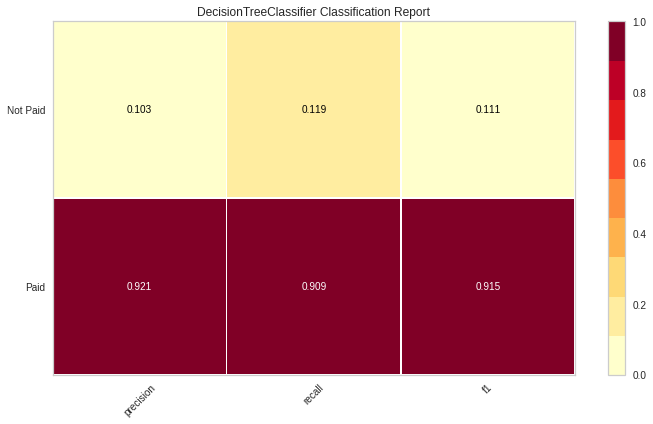

In [96]:
fig, ax = plt.subplots(figsize= (10, 6))
cr = ClassificationReport(model, classes=['Paid', 'Not Paid'], label_encoder=mapping)
cr.score(X_test, y_test)
cr.poof()
fig.savefig('/content/drive/MyDrive/DT&ML/Analise de Risco/classification_report.png')

###Confusion Matrix

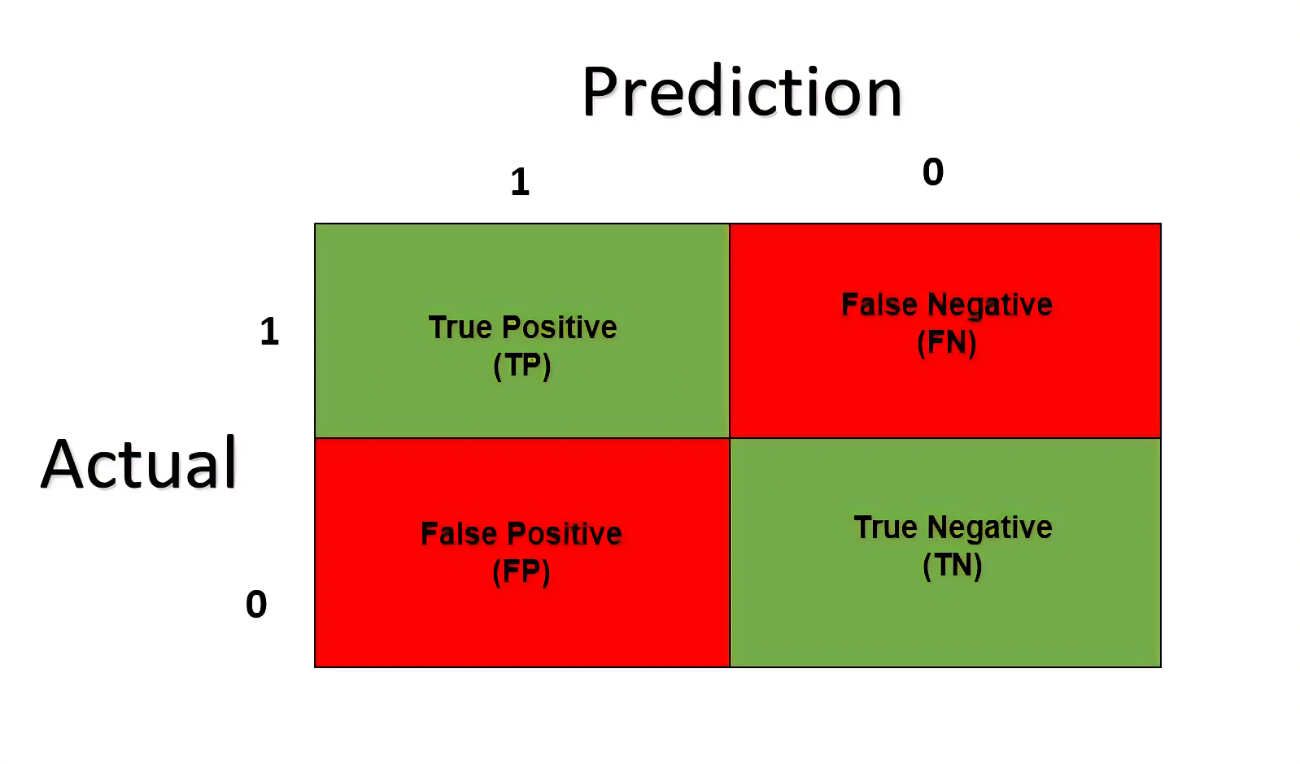

####Used to evaluate the errors and successes of the model
**Hits**:
- True positives: it is the number of prediction hits, that is, the model predicted that whoever would pay actually paid
- True negatives: it is the number of prediction hits, that is, the model predicted that those who would not pay actually did not pay.

**Errors**:
- False positives: it is the amount of forecast errors, that is, the model predicted that it would pay but did not pay
- False negatives: it is the amount of forecast errors, that is, the model predicted that it would not pay but paid 

In [49]:
mapping = {0: "Paid", 1: 'Not Paid'}

/usr/local/lib/python3.7/dist-packages/yellowbrick/classifier/base.py:234: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


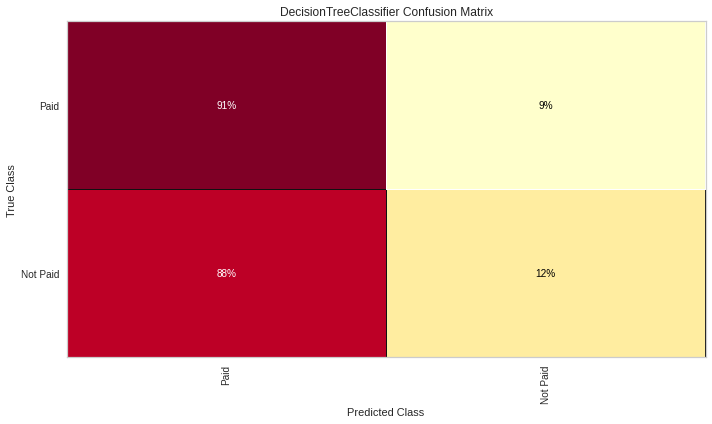

In [91]:
fig, ax = plt.subplots(figsize=(10,6))
cm_viz = ConfusionMatrix(model, classes= ["Paid", "Not Paid"], label_encoder= mapping, percent=True)
cm_viz.score(X_test, y_test)
cm_viz.poof()
fig.savefig('/content/drive/MyDrive/DT&ML/Analise de Risco/confusion_matrix_percent.png')

/usr/local/lib/python3.7/dist-packages/yellowbrick/classifier/base.py:234: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


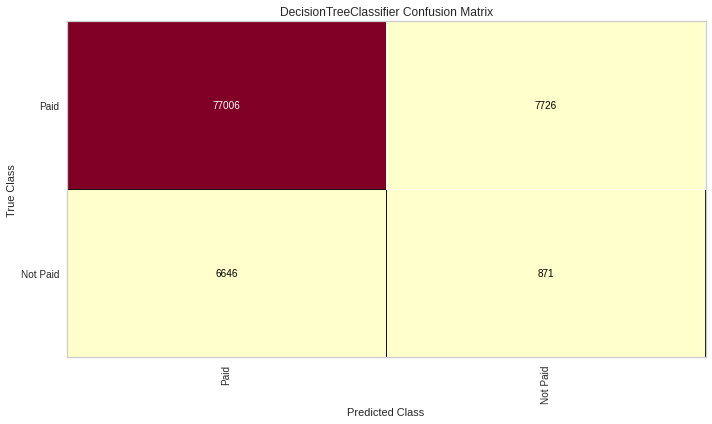

In [74]:
fig, ax = plt.subplots(figsize=(10,6))
cm_viz = ConfusionMatrix(model, classes= ["Paid", "Not Paid"], label_encoder= mapping)
cm_viz.score(X_test, y_test)
cm_viz.poof()
fig.savefig('/content/drive/MyDrive/DT&ML/Analise de Risco/confusion_matrix.png')

####The model has an excellent prediction of who pays the loan, with an error percentage of only 9%, but with those who do not pay, the model cannot predict very well since the error percentage is 88%

###ROC
Shows the performance of the classifier, displaying the true positive rate as the false positive rate changes, the row that is furthest to the left and above signals better performance

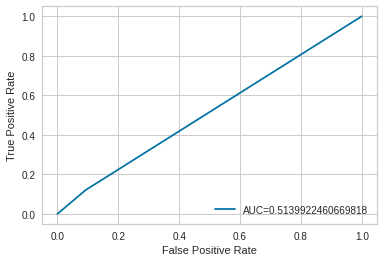

In [109]:
#define metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
fig.savefig('/content/drive/MyDrive/DT&ML/Analise de Risco/ROC.png')

##Insights

- The annuity is the factor that has the most impact on whether the client pays the loan or not 
- As well as the number of days of employment
- The number of days the client has changed their phone also has a big impact on whether they will repay the loan.
- Whether or not to own a home and the number of children has little impact on the ability to repay the loan.
- Whether the client has a home or not has little effect on the loan payment

- There is not a large amount of data on who has not repaid the loan, so the model is not as efficient in predicting this scenario.
